In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("bank_transactions_data_2.csv")

In [3]:
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [5]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [6]:
df.shape

(2512, 16)

In [7]:
df.columns

Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate'],
      dtype='object')

In [8]:
cat_column = df[["TransactionType","Location","MerchantID","Channel","CustomerOccupation"]]
for col in cat_column.columns:
    print(f"Column: {col}")
    print(df[col].value_counts().head())
    print("-------------")

Column: TransactionType
TransactionType
Debit     1944
Credit     568
Name: count, dtype: int64
-------------
Column: Location
Location
Fort Worth       70
Los Angeles      69
Oklahoma City    68
Charlotte        68
Tucson           67
Name: count, dtype: int64
-------------
Column: MerchantID
MerchantID
M026    45
M066    34
M065    33
M013    33
M014    33
Name: count, dtype: int64
-------------
Column: Channel
Channel
Branch    868
ATM       833
Online    811
Name: count, dtype: int64
-------------
Column: CustomerOccupation
CustomerOccupation
Student     657
Doctor      631
Engineer    625
Retired     599
Name: count, dtype: int64
-------------


In [9]:
cat_column = df[["Channel","CustomerOccupation",'LoginAttempts']]
for col in cat_column.columns:
    print(f"Column: {col}")
    print(df[col].value_counts().head())
    print("-------------")

Column: Channel
Channel
Branch    868
ATM       833
Online    811
Name: count, dtype: int64
-------------
Column: CustomerOccupation
CustomerOccupation
Student     657
Doctor      631
Engineer    625
Retired     599
Name: count, dtype: int64
-------------
Column: LoginAttempts
LoginAttempts
1    2390
5      32
4      32
3      31
2      27
Name: count, dtype: int64
-------------


In [10]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])
df['DaysSinceLastTransaction'] = abs((df['TransactionDate'] - df['PreviousTransactionDate']).dt.days)

In [11]:
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,DaysSinceLastTransaction
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08,573
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,496
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04,483
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06,549
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39,385


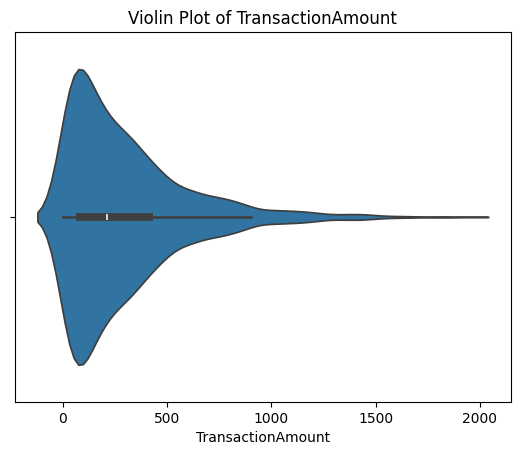

In [12]:
sns.violinplot(x = df["TransactionAmount"])
plt.title("Violin Plot of TransactionAmount")
plt.show()

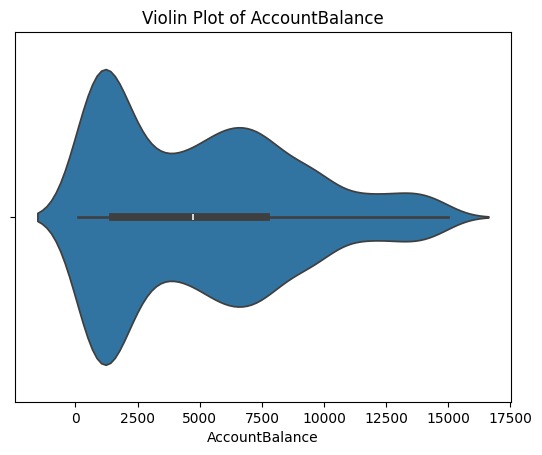

In [60]:
sns.violinplot(x = df["AccountBalance"])
plt.title("Violin Plot of AccountBalance")
plt.show()

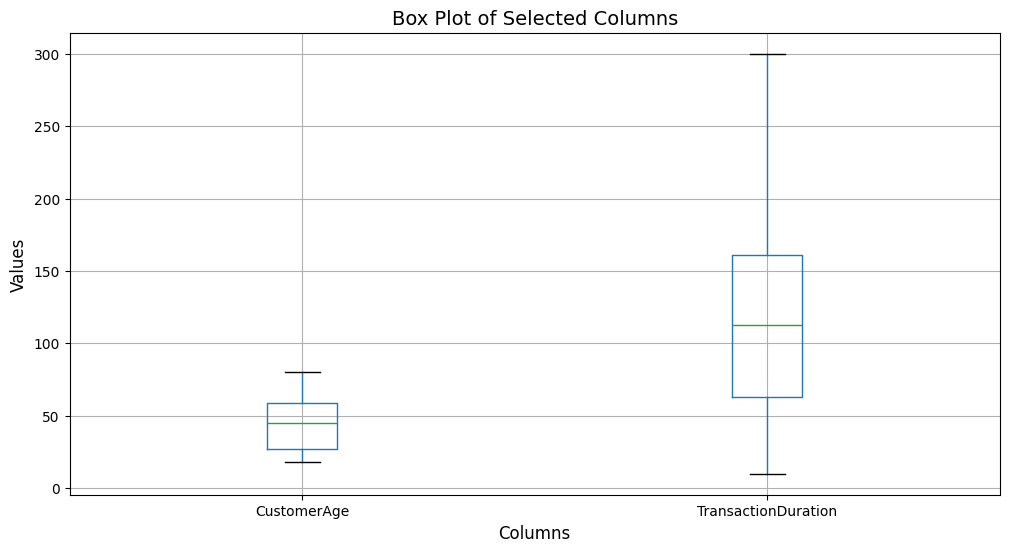

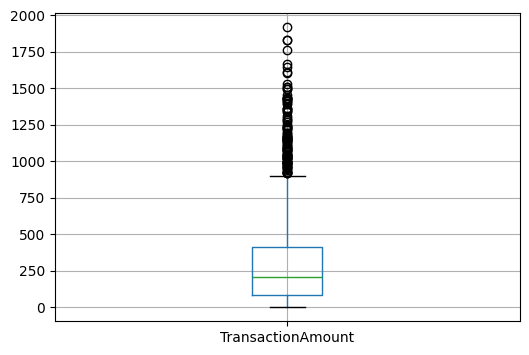

In [13]:
plt.figure(figsize=(12, 6))
df.boxplot(column=["CustomerAge","TransactionDuration"])
plt.title('Box Plot of Selected Columns', fontsize=14)
plt.ylabel('Values', fontsize=12)
plt.xlabel('Columns', fontsize=12)
plt.figure(figsize=(6, 4))
df.boxplot(column=["TransactionAmount"])
plt.show()

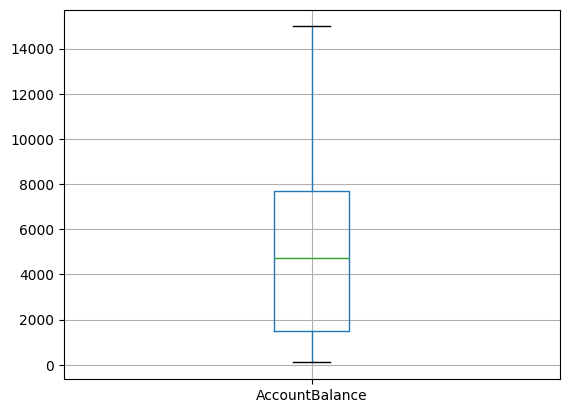

In [14]:
df.boxplot(column=["AccountBalance"])
plt.show()

In [15]:
df_clean = df.drop(columns = ["TransactionID","AccountID","MerchantID","IP Address","DeviceID","TransactionDate","PreviousTransactionDate"])
df_clean_copy = df_clean.copy()

In [16]:
df_clean.columns

Index(['TransactionAmount', 'TransactionType', 'Location', 'Channel',
       'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'DaysSinceLastTransaction'],
      dtype='object')

In [17]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [18]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
categorical_cols = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']
encoder = LabelEncoder()
for col in categorical_cols:
    df_clean[col] = encoder.fit_transform(df_clean[col])


In [19]:
df_clean.head()


,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,DaysSinceLastTransaction
0,14.09,1,36,0,70,0,81,1,5112.21,573
1,376.24,1,15,0,68,0,141,1,13758.91,496
2,126.29,1,23,2,19,3,56,1,1122.35,483
3,184.50,1,33,2,26,3,25,1,8569.06,549
4,13.45,0,1,2,26,3,198,1,7429.40,385


In [20]:
df_clean_copy.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,DaysSinceLastTransaction
0,14.09,Debit,San Diego,ATM,70,Doctor,81,1,5112.21,573
1,376.24,Debit,Houston,ATM,68,Doctor,141,1,13758.91,496
2,126.29,Debit,Mesa,Online,19,Student,56,1,1122.35,483
3,184.50,Debit,Raleigh,Online,26,Student,25,1,8569.06,549
4,13.45,Credit,Atlanta,Online,26,Student,198,1,7429.40,385


In [21]:
df_clean_numeric = df_clean[["TransactionAmount","CustomerAge","TransactionDuration","AccountBalance","DaysSinceLastTransaction"]]
non_numeric = df_clean[categorical_cols]

In [22]:
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_clean_numeric), columns=df_clean_numeric.columns)

data = pd.concat([df_scaled, non_numeric], axis=1)

In [23]:
inputs= data.columns
data.head()

,TransactionAmount,CustomerAge,TransactionDuration,AccountBalance,DaysSinceLastTransaction,TransactionType,Location,Channel,CustomerOccupation
0,0.007207,0.838710,0.244828,0.336832,0.728022,1,36,0,0
1,0.195940,0.806452,0.451724,0.918055,0.516484,1,15,0,0
2,0.065680,0.016129,0.158621,0.068637,0.480769,1,23,2,3
3,0.096016,0.129032,0.051724,0.569198,0.662088,1,33,2,3
4,0.006874,0.129032,0.648276,0.492591,0.211538,0,1,2,3


In [24]:
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
iso_forest.fit(data)

IsolationForest(contamination=0.05, random_state=42)

In [25]:
data['AnomalyScore'] = iso_forest.decision_function(data)
data["Anomaly"] = iso_forest.predict(data[inputs])

In [26]:
data['Anomaly'] = data['Anomaly'].apply(lambda x: "Anomaly" if x == -1 else "Normal")

In [27]:
data[data['Anomaly'] == "Anomaly"].head()

,TransactionAmount,CustomerAge,TransactionDuration,AccountBalance,DaysSinceLastTransaction,TransactionType,Location,Channel,CustomerOccupation,AnomalyScore,Anomaly
4,0.006874,0.129032,0.648276,0.492591,0.211538,0,1,2,3,-0.012914,Anomaly
6,0.003554,0.306452,0.444828,0.888330,0.879121,0,39,0,0,-0.023492,Anomaly
73,0.121771,0.129032,0.931034,0.432647,0.200549,0,17,2,3,-0.016634,Anomaly
85,0.698298,0.580645,0.068966,0.574926,0.258242,0,2,2,1,-0.041713,Anomaly
113,0.111265,0.967742,0.937931,0.230391,0.840659,0,9,0,2,-0.006420,Anomaly


In [28]:
df["Anomaly"] = data['Anomaly']
df_clean["Anomaly"] = data['Anomaly']

In [42]:
print(df["Anomaly"].value_counts())

Anomaly
Normal     2386
Anomaly     126
Name: count, dtype: int64


<Axes: ylabel='TransactionAmount'>

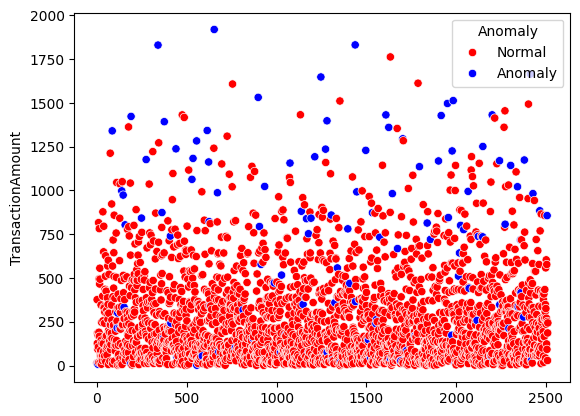

In [30]:
sns.scatterplot(x=range(len(df)),y="TransactionAmount",hue = "Anomaly",data = df,palette = ["red","blue"])

In [56]:
def outlier_plot(df,X,Y):
    print(f"Number of anomalous values {len(df[df_clean["Anomaly"]=="Anomaly"])}")
    print(f"Number of non anomalous avlues {len(df[df_clean["Anomaly"]=="Normal"])}")
    s = sns.FacetGrid(df, col="Anomaly", col_order=["Anomaly", "Normal"], height=5,hue = "Anomaly",hue_order=["Normal","Anomaly"])
    s.map(sns.scatterplot,X,Y)
    axes = s.axes.flatten()
    axes[0].set_title(f"Outliers\n{len(df[df["Anomaly"]=="Anomaly"])} points")
    axes[1].set_title(f"Inliers\n{len(df[df["Anomaly"]=="Normal"])} points")
    return s

Number of anomalous values 126
Number of non anomalous avlues 2386


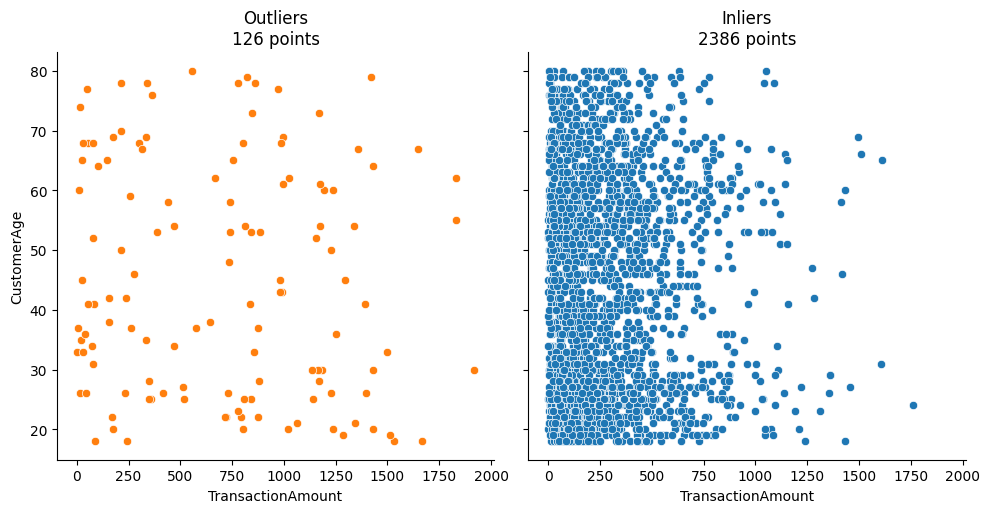

In [57]:
outlier_plot(df,"TransactionAmount","CustomerAge")

Number of anomalous values 126
Number of non anomalous avlues 2386


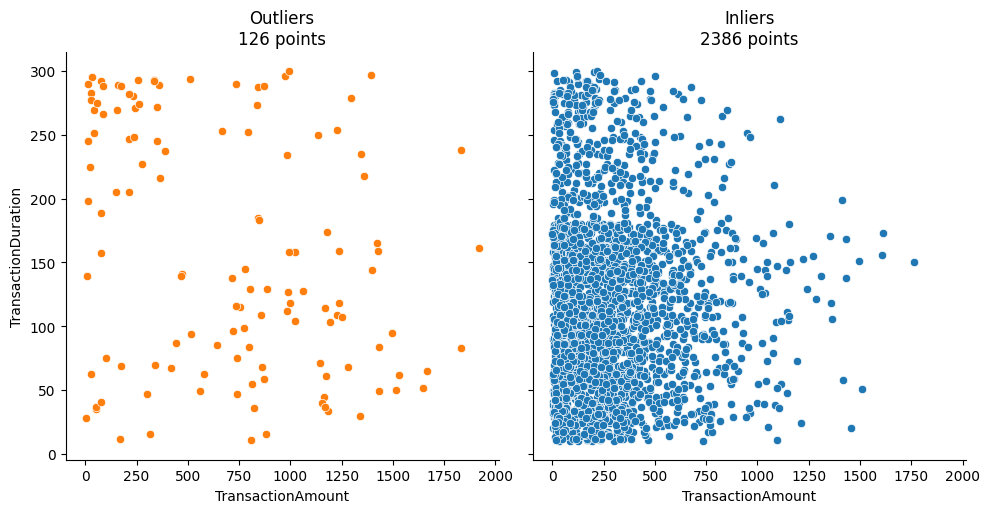

In [58]:
outlier_plot(df,"TransactionAmount","TransactionDuration")

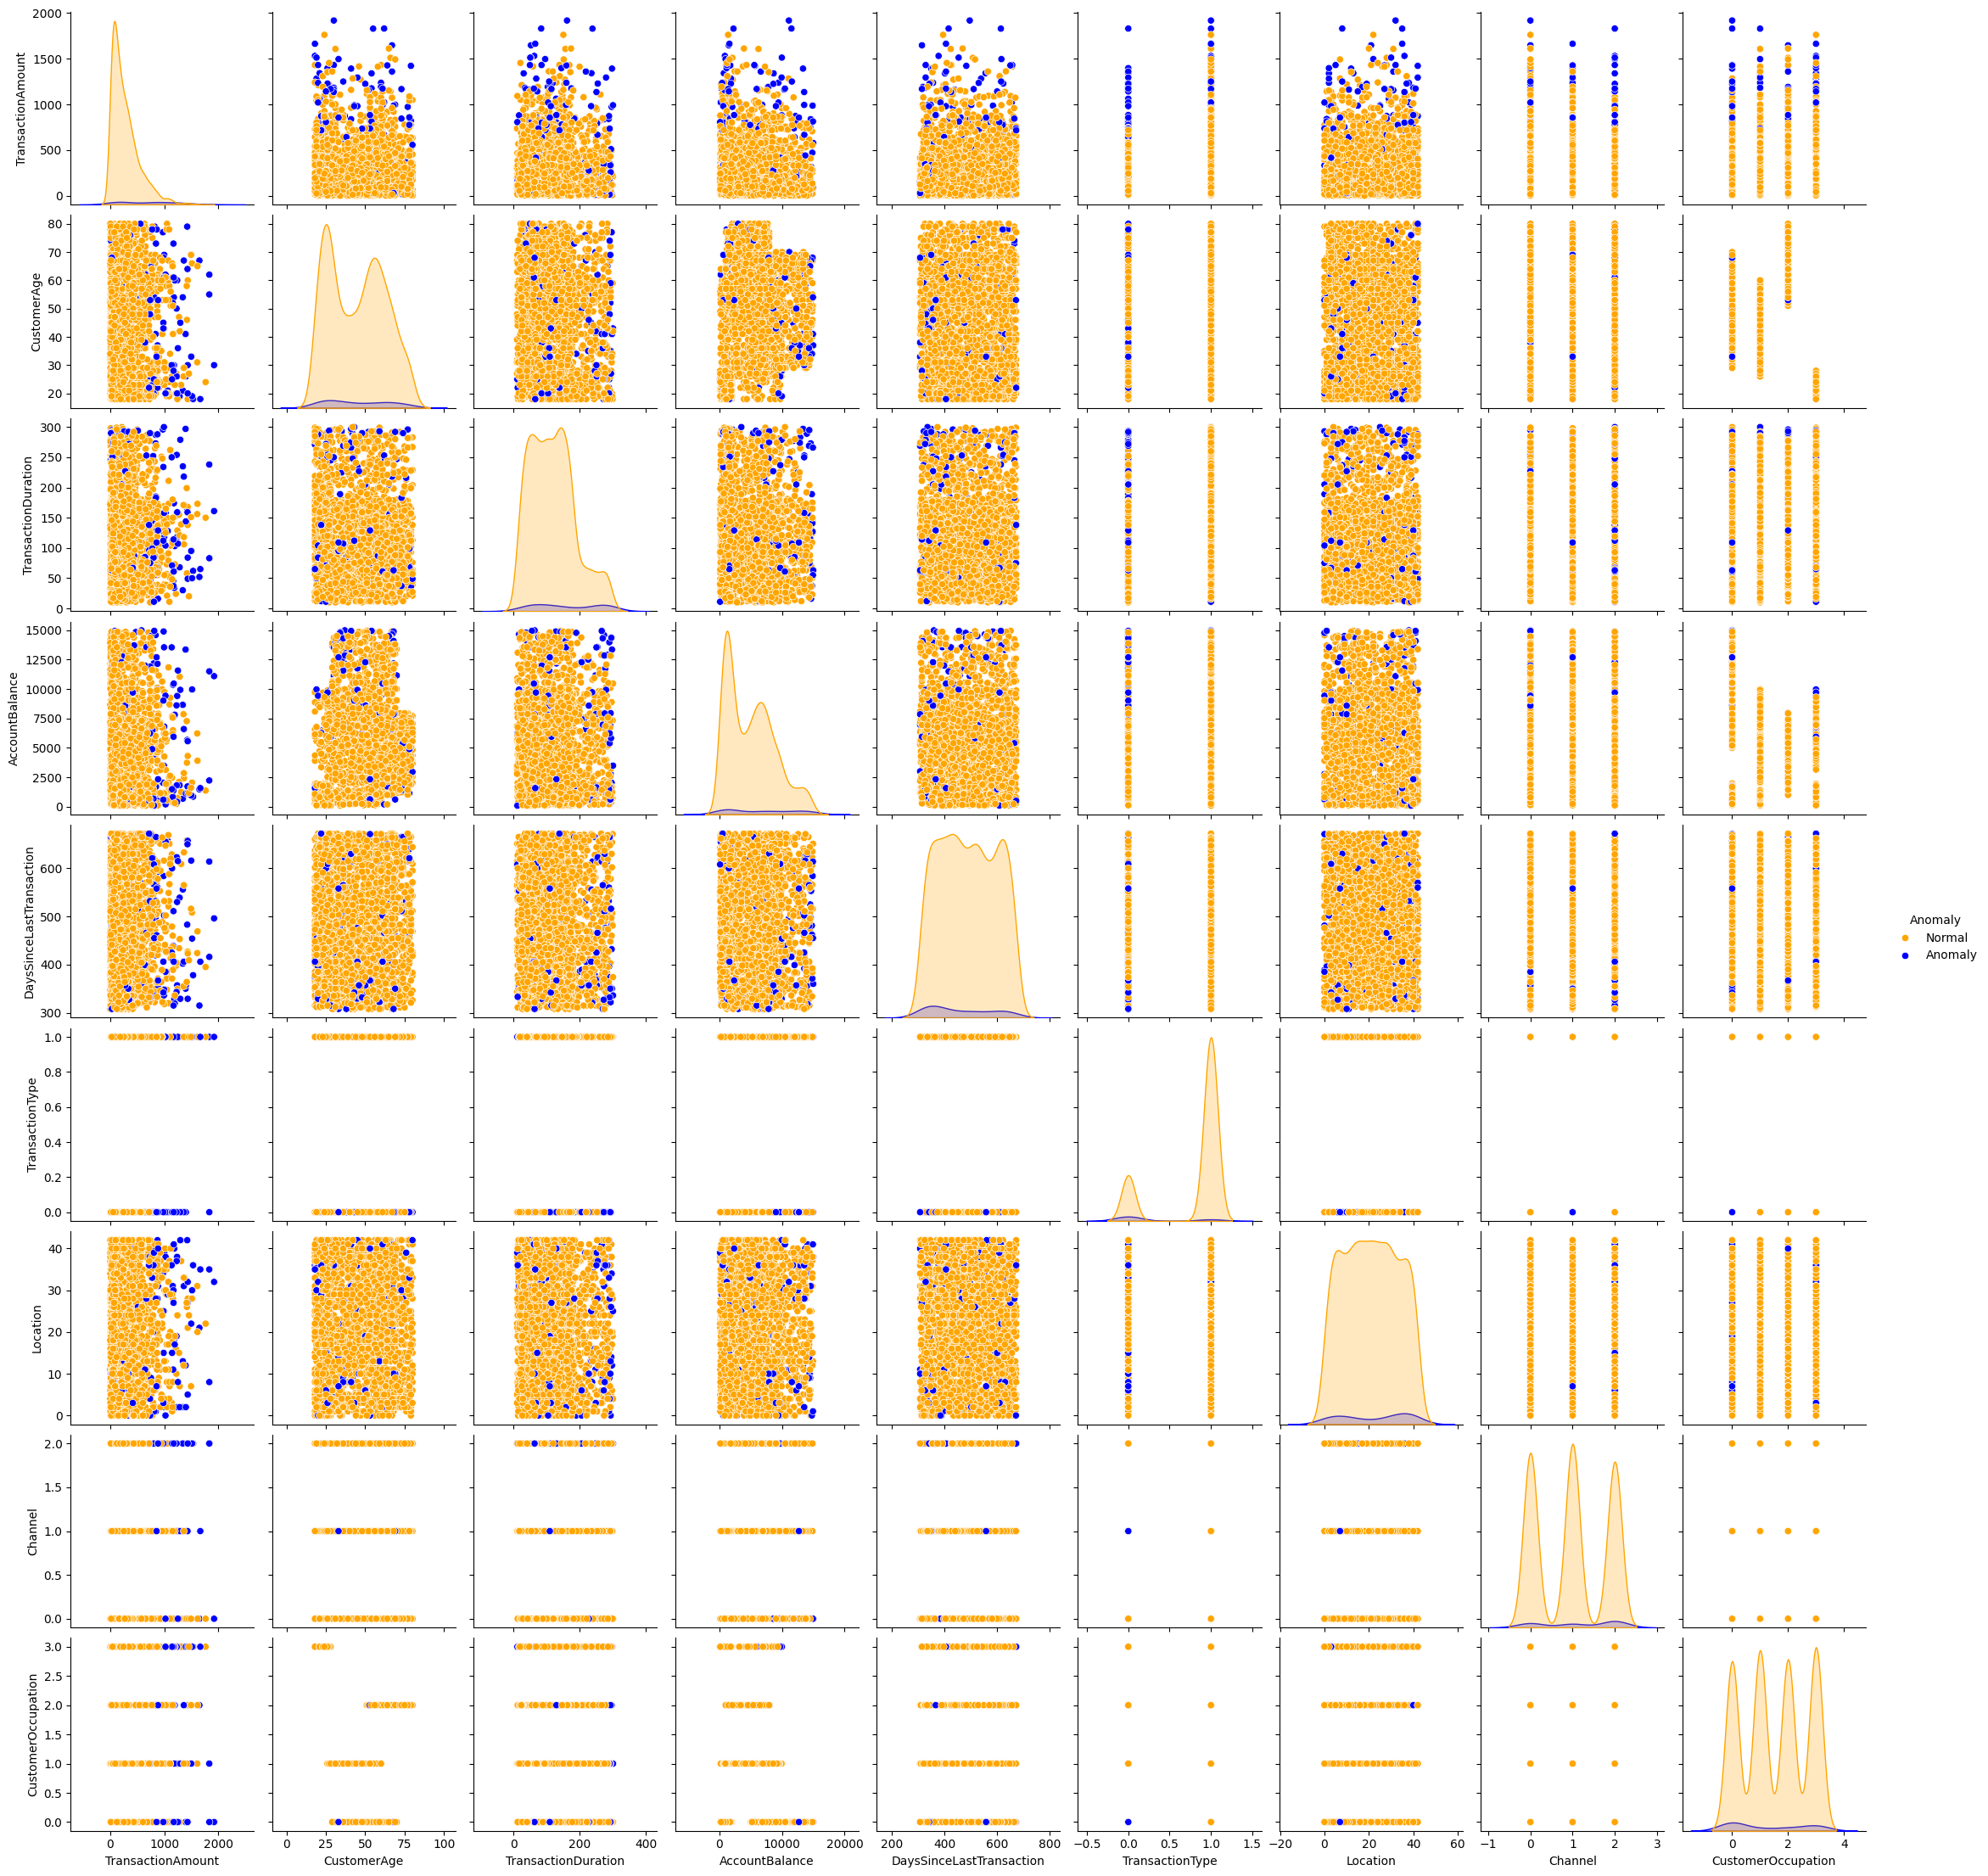

In [ ]:
sns.pairplot(df_clean,vars = inputs ,hue="Anomaly",palette = ["orange","blue"])